In [13]:
from functools import wraps # This convenience func preserves name and docstring
import matplotlib
import matplotlib.pyplot as plt
import io
from PIL import Image

# test using only images

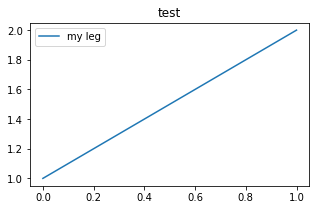

In [40]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot([1, 2], label='my leg')
ax.set_title("test")
ax.legend()

Text(0.5, 1.0, 'test 2')

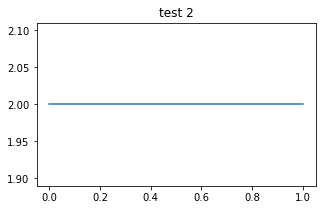

In [41]:
fig2, ax2 = plt.subplots(figsize=(5,3))
#plt.figure()
ax2.plot([2, 2])
ax2.set_title("test 2")

In [84]:
def __add__(self, o):
    """
    Function designed to overload to the __add__ operator of the Matplotlib Figure class
    so that you can add figures together to create a new figure with the input figures
    as subplots
    """
    # create lists of figure attributes to loop through
    figs = [self, o]
    im, w, h = [], [], []
    
    # loop through each figure and save figure to the image buffer, then reload
    # from buffer and save to the im list as a image object
    for f in figs:
        buf = io.BytesIO()
        f.savefig(buf, format='png', bbox_inches='tight', pad_inches=0.02, dpi=400)
        buf.seek(0)
        im.append(Image.open(buf))
        w.append(f.get_size_inches()[0])
        h.append(f.get_size_inches()[1])
    
    # get size of new figure
    wn = (w[0] + w[1])
    hn = max(h[0],h[1])
    
    # create output figure. Use ratio of figure widths to scale subplots
    fig, ax = plt.subplots(1,2, figsize=(wn,hn), gridspec_kw={'width_ratios': [w[0], w[1]]})
    
    # load saved images as subplots
    for i, f in enumerate(im):
        ax[i].imshow(f) #, aspect='auto'
        ax[i].axis('off')
    
    # tidy output figure and close buffer
    fig.subplots_adjust(wspace=0.01, hspace=0)
    buf.close()
    plt.close() # prevents double printing in Jupyter notebooks
    
    return fig

# override __add__ method in Figure object
setattr(matplotlib.figure.Figure, '__add__', __add__)

In [85]:
def __truediv__(self, o):
    """
    Function designed to overload to the __treudiv__ operator of the Matplotlib Figure class
    so that you can stack figures together to create a new figure with the input figures
    as subplots
    """
    # create lists of figure attributes to loop through
    figs = [self, o]
    im, w, h = [], [], []
    
    # loop through each figure and save figure to the image buffer, then reload
    # from buffer and save to the im list as a image object
    for f in figs:
        buf = io.BytesIO()
        f.savefig(buf, format='png', bbox_inches='tight', pad_inches=0.02, dpi=400)
        buf.seek(0)
        im.append(Image.open(buf))
        w.append(f.get_size_inches()[0])
        h.append(f.get_size_inches()[1])
    
    # get size of new figure
    hn = (h[0] + h[1])
    wn = max(w[0],w[1])
    
    # create output figure. Use ratio of figure widths to scale subplots
    fig, ax = plt.subplots(2,1, figsize=(wn,hn), gridspec_kw={'height_ratios': [h[0], h[1]]})
    
    # load saved images as subplots
    for i, f in enumerate(im):
        ax[i].imshow(f)
        ax[i].axis('off')
    
    # tidy output figure and close buffer
    fig.subplots_adjust(wspace=0.01, hspace=0)
    buf.close()
    plt.close() # prevents double printing in Jupyter notebooks
    
    return fig

# override __add__ method in Figure object
setattr(matplotlib.figure.Figure, '__truediv__', __truediv__)

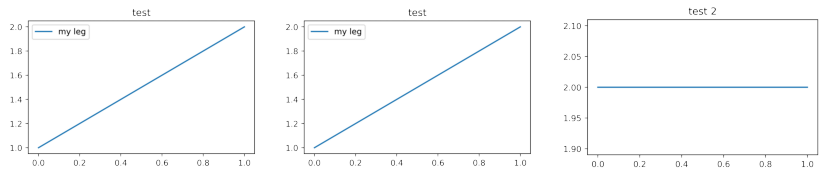

In [86]:
fig + fig + fig2

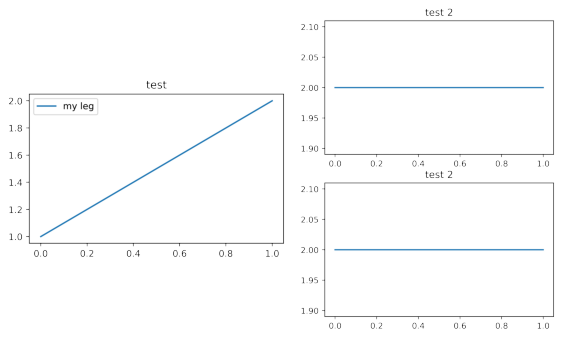

In [87]:
fig+(fig2/fig2)

In [99]:
tst = (fig+fig2)/(fig+fig)

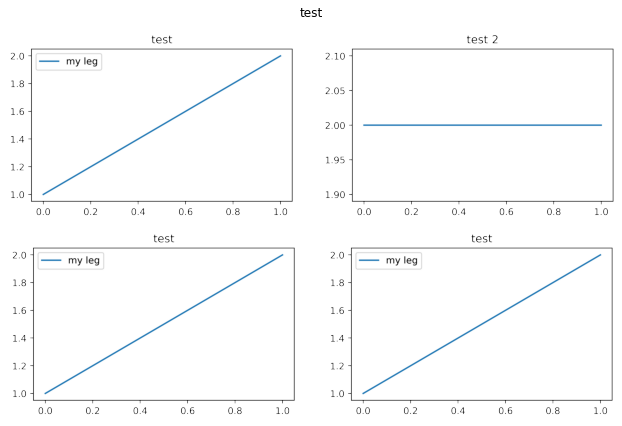

In [105]:
tst.suptitle('test')
tst.tight_layout()
tst

In [93]:
out = fig + fig2 + fig2

In [94]:
out = out + fig2 + fig

In [95]:
out.show()

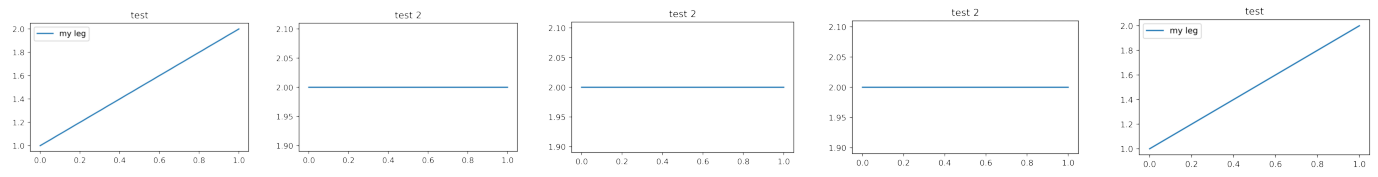

In [96]:
out